In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [66]:
df=pd.read_csv("knn_dataset.csv")

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X= df.drop('CLASS',axis=1)
y = df.CLASS
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=0)

In [11]:
print(X_train)
print(y_train)

   AGE  INCOME  NO.OF CARDS
1   22   50000            2
0   35   35000            3
1    Yes
0     No
Name: CLASS, dtype: object


In [12]:
print(X_test)
print(y_test)

   AGE  INCOME  NO.OF CARDS
2   63   40000            4
2    Yes
Name: CLASS, dtype: object


In [67]:
import math
dataset = [
    {'age': 35, 'income': 35000, 'cards': 3, 'class': 'No'},
    {'age': 22, 'income': 50000, 'cards': 2, 'class': 'Yes'},
    {'age': 63, 'income': 40000, 'cards': 4, 'class': 'Yes'}
]

def euclidean_distance(point1, point2):
    distance = 0
    for key in point1.keys():
        distance += (point1[key] - point2[key]) ** 2
    return math.sqrt(distance)

# Define the KNN algorithm
def knn(dataset, new_data, k):
    distances = []
    for data in dataset:
        distance = euclidean_distance(new_data, data)
        distances.append((data, distance))
    sorted_distances = sorted(distances, key=lambda x: x[1])
    neighbors = sorted_distances[:k]
    class_votes = {'Yes': 0, 'No': 0}  # Assuming two classes: 'Yes' and 'No'
    for neighbor in neighbors:
        class_votes[neighbor[0]['class']] += 1
    return max(class_votes, key=class_votes.get)


new_data_point = {'age': 35, 'income': 35000, 'cards': 3}


k = 3


predicted_class = knn(dataset, new_data_point, k)
print("Predicted class:", predicted_class)


def confusion_matrix(actual, predicted):
    classes = set(actual)
    matrix = {actual_class: {predicted_class: 0 for predicted_class in classes} for actual_class in classes}
    for i in range(len(actual)):
        matrix[actual[i]][predicted[i]] += 1
    return matrix


actual_classes = [data['class'] for data in dataset]


predicted_classes = [knn(dataset, new_data_point, k) for _ in range(len(dataset))]


matrix = confusion_matrix(actual_classes, predicted_classes)


print("Confusion Matrix:")
for actual_class, row in matrix.items():
    print(actual_class, row)
    

def accuracy(matrix):
    total_instances = sum(sum(row.values()) for row in matrix.values())
    correct_predictions = sum(matrix[class_label][class_label] for class_label in matrix.keys())
    return correct_predictions / total_instances


accuracy_value = accuracy(matrix)


print("Accuracy:", accuracy_value)


Predicted class: Yes
Confusion Matrix:
No {'No': 0, 'Yes': 1}
Yes {'No': 0, 'Yes': 2}
Accuracy: 0.6666666666666666


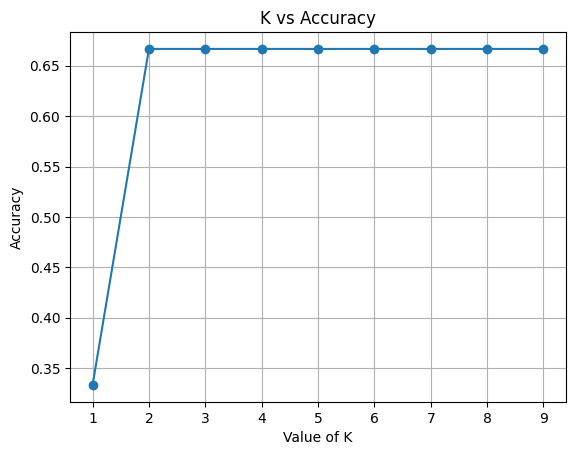

In [62]:
import matplotlib.pyplot as plt

# Define a function to calculate accuracy for a given value of k
def cal_accuracy_k(dataset, new_data_point, k):
    actual_classes = [data['class'] for data in dataset]
    predicted_classes = [knn(dataset, new_data_point, k) for _ in range(len(dataset))]
    matrix = confusion_matrix(actual_classes, predicted_classes)
    return accuracy(matrix)

# Define a range of K values to test
k_values = list(range(1, 10))  # Testing K values from 1 to 20

# Calculate accuracy for each value of K
accuracies = [cal_accuracy_k(dataset, new_data_point, k) for k in k_values]

# Plot the curve "k vs accuracy"
plt.plot(k_values, accuracies, marker='o', linestyle='-')
plt.title("K vs Accuracy")
plt.xlabel("Value of K")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()


In [57]:
# Define a function to calculate accuracy for a given value of k
def cal_accuracy_k(dataset, new_data_point, k):
    actual_classes = [data['class'] for data in dataset]
    predicted_classes = [knn(dataset, new_data_point, k) for _ in range(len(dataset))]
    matrix = confusion_matrix(actual_classes, predicted_classes)
    return accuracy(matrix)

# Define a range of K values to test
k_values = list(range(1, 21))  # Testing K values from 1 to 20

# Calculate accuracy for each value of K
accuracies = [cal_accuracy_k(dataset, new_data_point, k) for k in k_values]

# Find the optimal value of K with maximum accuracy
optimal_k = k_values[accuracies.index(max(accuracies))]

print("Optimal value of K for maximum accuracy:", optimal_k)
print("Maximum accuracy achieved:", max(accuracies))


Optimal value of K for maximum accuracy: 2
Maximum accuracy achieved: 0.6666666666666666
